## ⏬ **Import Modules & Set Up Environment**

*Importing necessary libraries for data manipulation and visualization*

In [1]:
# Math-related functionality
from math import pi  # Provides the constant pi (π), often used in mathematical calculations involving circles or geometry

# Word cloud generation
from wordcloud import WordCloud  # Used to generate word clouds, visual representations of text data where word frequency is highlighted

# Data manipulation and analysis
import pandas as pd  # For working with dataframes and data manipulation

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For enhancing statistical graphics in matplotlib
import plotly.express as px  # For creating interactive plots with Plotly


*Setting up interactive environment*

In [2]:
# IPython functionality for interactive environments
from IPython.core.interactiveshell import InteractiveShell  # Controls interactive shell behavior

# Setting IPython display option to show all outputs in a single cell
# This ensures that all outputs from the cell are displayed, not just the result of the last line.
InteractiveShell.ast_node_interactivity = "all"


## 📂 **Load Dataset**

In [3]:
# Read data
df = pd.read_csv("../data/cleaned_car_data.csv")


- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

In [4]:
# Updated list of numeric columns
numerical_features = [
    'Reg_year', 'Reg_month', 'Days_since_registration', 'Coe_left', 'Depreciation',
    'Mileage', 'Road_Tax', 'Dereg_Value', 'COE', 'Engine_Capacity', 'Curb_Weight',
    'OMV', 'ARF', 'Power', 'Price'
]

# Updated list of categorical columns
categorical_features = [
    'Brand', 'Type', 'Manufactured', 'Transmission', 
    # The number of owners usually falls into a small, finite range (e.g., 1, 2, 3, etc.).
    # These values represent distinct categories rather than continuous quantities. For example:
    # A vehicle with "1 owner" is categorically different from a vehicle with "3 owners."
    # There’s no meaningful interpolation between these numbers (e.g., "1.5 owners" doesn’t make sense).
    'Number_of_Owners'
]


## 🔎 **Exploratory Data Analysis (EDA)**

## 🟨 **EDA - Dataset Overview**

### 🟨 **Shape**
*Understanding Dataset Dimensions*
- Displays the number of rows and columns in the DataFrame.
- Returns a tuple with the number of rows and columns in the DataFrame (rows, columns)

In [5]:
df.shape


(2494, 20)

### 🟨 **Preview**
*Viewing the First Few Rows of the Dataset*
-  Displays the top 3 rows of the DataFrame to quickly inspect the data structure and values.
- Includes sample data for each column to provide context.

In [6]:
# Displaying the first 3 rows of the DataFrame
# Returns the first 3 rows of the DataFrame to quickly inspect the data
df.head(3)


Brand        Type  Reg_year  \
0            Honda Vezel 1.5A X Honda Sensing         Suv      2015   
1  Suzuki Swift Sport 1.6M (Coe Till 12/2022)   Hatchback      2007   
2                 Porsche 718 Cayman 2.0A Pdk  Sports Car      2017   

   Reg_month  Days_since_registration  Coe_left  Depreciation  Mileage  \
0         10                     3394      1587         10310    50000   
1         12                     6241       201          8210   203000   
2          7                     2750      2202         34200    21000   

   Road_Tax  Dereg_Value    COE  Engine_Capacity  Curb_Weight  Manufactured  \
0       682        31237  56001             1496         1190          2015   
1      1030         6656  21349             1586         1060          2007   
2      1200       106829  50110             1988         1365          2017   

  Transmission    OMV     ARF  Power  Number_of_Owners   Price  
0         Auto  19775    9775     96                 2   49800  
1       Manual  12154   13370     92                 2   12800  
2         Auto  71979  101563    220                 1  259988

### 🟨 **Information**
*Dataset Structure and Metadata*
- Displays non-null counts, data types, and memory usage for each column.
- Numerical Features: Verifies expected data types (e.g., int, float).
- Categorical Features: Ensures object types align with column content.

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Brand                    2494 non-null   object
 1   Type                     2494 non-null   object
 2   Reg_year                 2494 non-null   int64 
 3   Reg_month                2494 non-null   int64 
 4   Days_since_registration  2494 non-null   int64 
 5   Coe_left                 2494 non-null   int64 
 6   Depreciation             2494 non-null   int64 
 7   Mileage                  2494 non-null   int64 
 8   Road_Tax                 2494 non-null   int64 
 9   Dereg_Value              2494 non-null   int64 
 10  COE                      2494 non-null   int64 
 11  Engine_Capacity          2494 non-null   int64 
 12  Curb_Weight              2494 non-null   int64 
 13  Manufactured             2494 non-null   int64 
 14  Transmission             2494 non-null  

### 🟨 **Descriptive Statistics**
*Summarizing Key Characteristics of the Dataset*
- Generating summary statistics for both numerical and categorical columns.
- It helps identify data trends, detect anomalies, and understand the spread and distribution of values.
- Numerical features: Count, mean, std, min, max, and quartiles (25%, 50%, 75%).
- Categorical features: Count, unique categories, most frequent value, and its frequency.

In [8]:
df.describe(include='all')


Brand  Type     Reg_year    Reg_month  \
count                                    2494  2494  2494.000000  2494.000000   
unique                                   1227     7          NaN          NaN   
top     Mercedes-Benz C-Class C180 Avantgarde   Suv          NaN          NaN   
freq                                       41   560          NaN          NaN   
mean                                      NaN   NaN  2015.070970     6.726945   
std                                       NaN   NaN     3.846036     3.432639   
min                                       NaN   NaN  2005.000000     1.000000   
25%                                       NaN   NaN  2012.000000     4.000000   
50%                                       NaN   NaN  2016.000000     7.000000   
75%                                       NaN   NaN  2018.000000    10.000000   
max                                       NaN   NaN  2021.000000    12.000000   

        Days_since_registration     Coe_left   Depreciation        Mileage  \
count               2494.000000  2494.000000    2494.000000    2494.000000   
unique                      NaN          NaN            NaN            NaN   
top                         NaN          NaN            NaN            NaN   
freq                        NaN          NaN            NaN            NaN   
mean                3462.803528  2156.439054   15137.919006   74854.008821   
std                 1402.712090   872.800408   18149.236539   52207.367470   
min                 1337.000000     3.000000    4900.000000      18.000000   
25%                 2405.000000  1620.250000    9032.500000   35000.000000   
50%                 3087.500000  2201.500000   11345.000000   65255.500000   
75%                 4424.750000  2850.000000   15485.000000  108000.000000   
max                 7201.000000  3640.000000  313020.000000  610000.000000   

            Road_Tax    Dereg_Value           COE  Engine_Capacity  \
count    2494.000000    2494.000000   2494.000000      2494.000000   
unique           NaN            NaN           NaN              NaN   
top              NaN            NaN           NaN              NaN   
freq             NaN            NaN           NaN              NaN   
mean     1210.225742   48025.403368  44216.838813      1894.682438   
std       988.787188   40828.122719  16321.491449       712.548036   
min        70.000000    4036.000000   8000.000000       658.000000   
25%       684.000000   30416.000000  32909.000000      1497.000000   
50%       889.000000   39581.000000  42683.000000      1598.000000   
75%      1210.000000   55113.500000  53927.750000      1998.000000   
max     10611.000000  629526.000000  97889.000000      6752.000000   

        Curb_Weight  Manufactured Transmission            OMV            ARF  \
count   2494.000000   2494.000000         2494    2494.000000    2494.000000   
unique          NaN           NaN            2            NaN            NaN   
top             NaN           NaN         Auto            NaN            NaN   
freq            NaN           NaN         2450            NaN            NaN   
mean    1444.451083   2014.697273          NaN   36057.646752   40291.493585   
std      260.143161      3.815671          NaN   39027.444860   56132.877889   
min      806.000000   2005.000000          NaN    5588.000000     541.000000   
25%     1265.000000   2012.000000          NaN   18470.000000   15368.750000   
50%     1425.000000   2016.000000          NaN   26030.000000   25518.500000   
75%     1610.000000   2018.000000          NaN   38196.000000   43656.750000   
max     2760.000000   2021.000000          NaN  492350.000000  858230.000000   

              Power  Number_of_Owners         Price  
count   2494.000000       2494.000000  2.494000e+03  
unique          NaN               NaN           NaN  
top             NaN               NaN           NaN  
freq            NaN               NaN           NaN  
mean     129.184443          1.900561  1.001471e+05  
std 

### 🟨 **Unique Value Count**
*Counting the Number of Unique Values in Each Column*
- Displays the number of distinct values for each column in the DataFrame.
- Helps identify columns with low cardinality (e.g., binary or categorical) and high cardinality (e.g., unique identifiers).
- Useful for understanding the diversity and uniqueness of data in each feature.

In [9]:
df.nunique()


Brand                      1227
Type                          7
Reg_year                     17
Reg_month                    12
Days_since_registration    1611
Coe_left                   1338
Depreciation               1291
Mileage                    1168
Road_Tax                    248
Dereg_Value                2277
COE                         694
Engine_Capacity             137
Curb_Weight                 361
Manufactured                 17
Transmission                  2
OMV                        2090
ARF                        2058
Power                       168
Number_of_Owners              6
Price                       913
dtype: int64

### 🟨 **Duplicate Count**
*Identifying and Counting Duplicate Rows*
- Counts the number of duplicate rows in the DataFrame.
- Helps identify if there are redundant rows in the data.
- A value of 0 indicates no duplicates, while any positive number shows the count of repeated rows.

In [10]:
df.duplicated().sum()


np.int64(0)

## 🟩 **EDA - Univariate Analysis**

### 🟩 **Bar Chart**
*Visualizing Categorical Data Distribution*
- Represents categorical data with rectangular bars showing frequency, proportion, or summary statistics.
- Ideal for comparing values across categories.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1000x250 with 0 Axes>

<Axes: xlabel='Brand'>

Text(0.5, 1.0, 'Bar Chart of Brand')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'Count')

(array([   0,    1,    2, ..., 1224, 1225, 1226], shape=(1227,)),
 [Text(0, 0, 'Mercedes-Benz C-Class C180 Avantgarde'),
  Text(1, 0, 'Honda Vezel 1.5A X'),
  Text(2, 0, 'Honda Civic 1.6A Vti'),
  Text(3, 0, 'Toyota Corolla Altis 1.6A Elegance'),
  Text(4, 0, 'Mercedes-Benz Gla-Class Gla180 Urban Edition'),
  Text(5, 0, 'Mazda 3 1.5A Sunroof'),
  Text(6, 0, 'Honda Odyssey 2.4A Exv-S Sunroof'),
  Text(7, 0, 'Nissan Qashqai 1.2A Dig-T'),
  Text(8, 0, 'Honda Jazz 1.5A Rs'),
  Text(9, 0, 'Honda Shuttle 1.5A G'),
  Text(10, 0, 'Subaru Forester 2.0I-L Sunroof'),
  Text(11, 0, 'Bmw X1 Sdrive18I'),
  Text(12, 0, 'Honda Fit 1.3A G F-Package'),
  Text(13, 0, 'Mitsubishi Outlander 2.0A'),
  Text(14, 0, 'Mercedes-Benz Cla-Class Cla180 Urban'),
  Text(15, 0, 'Hyundai Elantra 1.6A Gls S'),
  Text(16, 0, 'Toyota Harrier 2.0A M-Grade Turbo'),
  Text(17, 0, 'Mazda 3 1.5A Deluxe'),
  Text(18, 0, 'Honda Vezel 1.5A X Honda Sensing'),
  Text(19, 0, 'Toyota Corolla Altis 1.6A Classic'),
  Text(20, 0, 'Merce

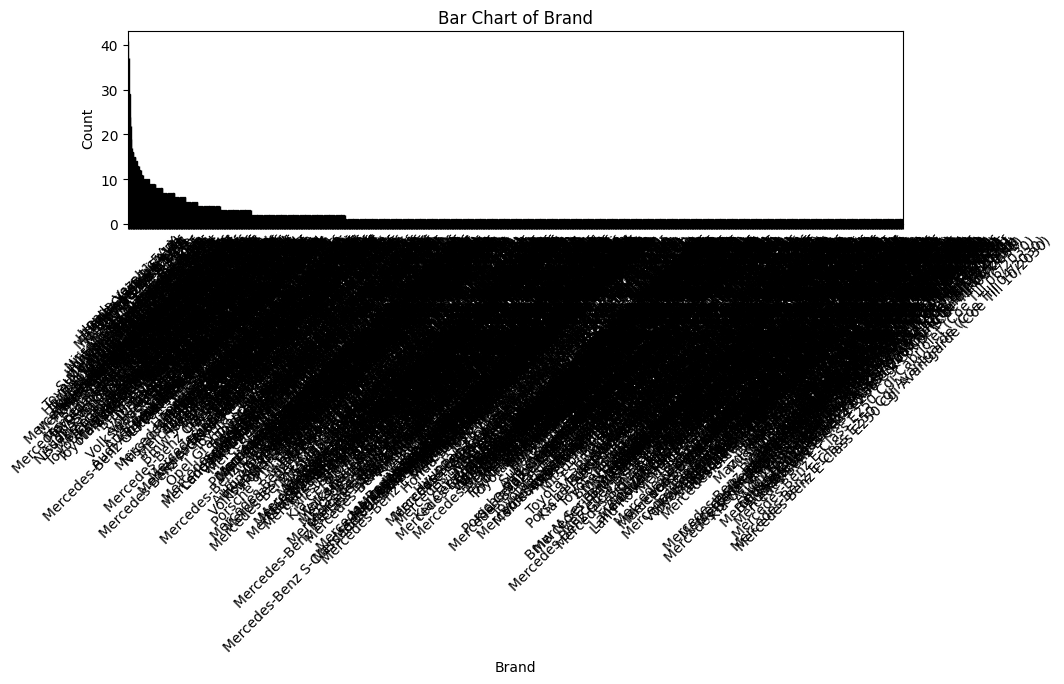

<Figure size 1000x250 with 0 Axes>

<Axes: xlabel='Type'>

Text(0.5, 1.0, 'Bar Chart of Type')

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Suv'),
  Text(1, 0, 'Luxury Sedan'),
  Text(2, 0, 'Mid-Sized Sedan'),
  Text(3, 0, 'Hatchback'),
  Text(4, 0, 'Sports Car'),
  Text(5, 0, 'Mpv'),
  Text(6, 0, 'Stationwagon')])

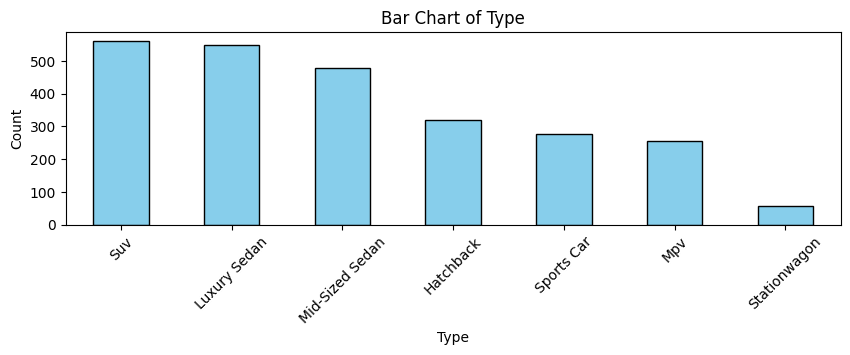

<Figure size 1000x250 with 0 Axes>

<Axes: xlabel='Manufactured'>

Text(0.5, 1.0, 'Bar Chart of Manufactured')

Text(0.5, 0, 'Manufactured')

Text(0, 0.5, 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2016'),
  Text(1, 0, '2018'),
  Text(2, 0, '2019'),
  Text(3, 0, '2017'),
  Text(4, 0, '2015'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2014'),
  Text(8, 0, '2010'),
  Text(9, 0, '2020'),
  Text(10, 0, '2013'),
  Text(11, 0, '2007'),
  Text(12, 0, '2012'),
  Text(13, 0, '2011'),
  Text(14, 0, '2006'),
  Text(15, 0, '2005'),
  Text(16, 0, '2021')])

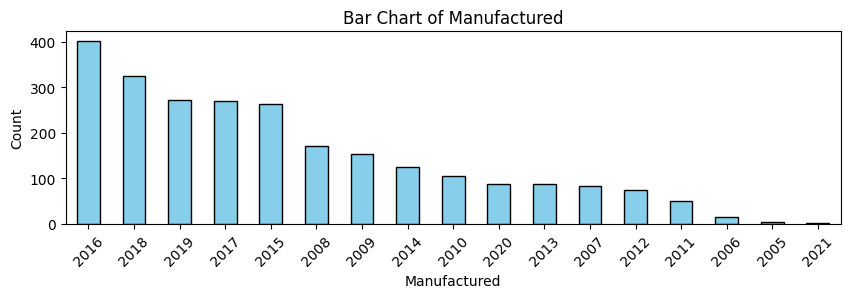

<Figure size 1000x250 with 0 Axes>

<Axes: xlabel='Transmission'>

Text(0.5, 1.0, 'Bar Chart of Transmission')

Text(0.5, 0, 'Transmission')

Text(0, 0.5, 'Count')

(array([0, 1]), [Text(0, 0, 'Auto'), Text(1, 0, 'Manual')])

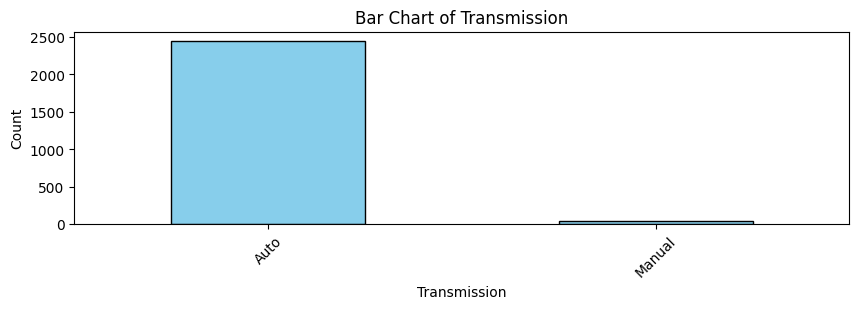

<Figure size 1000x250 with 0 Axes>

<Axes: xlabel='Number_of_Owners'>

Text(0.5, 1.0, 'Bar Chart of Number_of_Owners')

Text(0.5, 0, 'Number_of_Owners')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

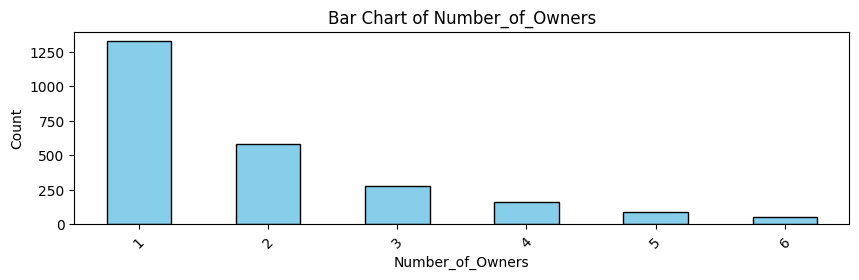

In [11]:
# Looping through each categorical feature in the 'categorical_features' list
for feature in categorical_features:
    
    # Creating a new figure for each categorical feature with a specified size (width: 10, height: 2.5)
    plt.figure(figsize=(10, 2.5))
    
    # Generating a bar plot for the count of each category in the current feature
    df[feature].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    # The bar color is set to 'skyblue' and the edges of the bars are outlined in 'black' for better contrast
    
    # Setting the title of the plot to indicate which feature is being visualized
    plt.title(f"Bar Chart of {feature}")
    
    # Labeling the x-axis with the name of the current feature
    plt.xlabel(feature)
    
    # Labeling the y-axis as "Count", representing the frequency of each category in the feature
    plt.ylabel("Count")
    
    # Rotating the x-axis tick labels by 45 degrees for better readability
    plt.xticks(rotation=45)
    
    # Displaying the plot
    plt.show()


💡 Observations from Categorical Variables

1. **`Brand`**:
   - The dataset consists of a majority of less common brands with a few brands dominating the data.

2. **`Type`**:
   - The most common types of vehicles are SUVs, luxury sedans, and mid-sized sedans.
   - The least common type is the station wagon.

3. **`Manufactured Date`**:
   - The highest number of vehicles were manufactured in 2016, with a gradual decrease for older years and very few for more recent years.

4. **`Transmission`**:
   - Most vehicles have automatic transmission.
   - Very few vehicles have manual transmission.

5. **`No. of Owners`**:
   - As the number of owners increases, the count of vehicles in the data decreases.
   - Vehicles with a single owner dominate the dataset, with significantly fewer records for higher numbers of owners.


### 🟩 **Boxplot**
*Visualizing Distribution and Outliers for Numerical Variables*
- A boxplot (or box-and-whisker plot) displays the distribution of a dataset, showing the median, quartiles, and potential outliers.
- The "box" represents the interquartile range (IQR), and the "whiskers" extend to the data range, with outliers marked as points.
- Useful for comparing distributions across categories and identifying extreme values.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='Price'>

Text(0.5, 1.0, 'Boxplot of Price')

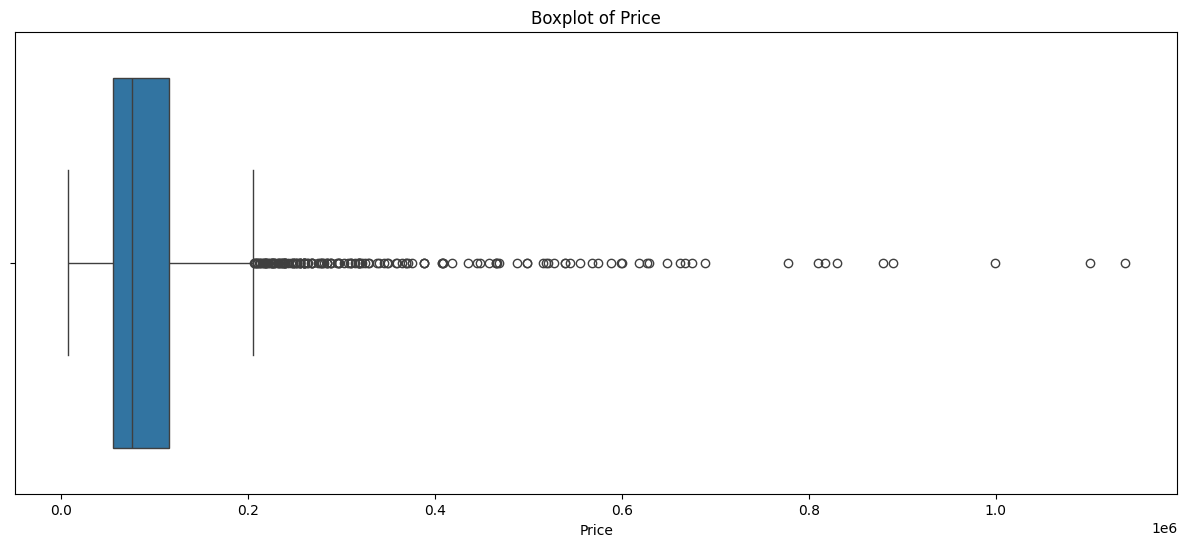

In [12]:
# Create a boxplot to visualize depreciation by price
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Price')
# sns.boxplot(data=df, y='Price') # Vertical version

# Set the title and display the plot
plt.title('Boxplot of Price')
plt.show()


### 🟩 **Count Plot**
*Visualizing the Frequency of Categorical Data*
- A count plot displays the frequency (or count) of observations for each category in a categorical variable.
- Each bar represents the count of occurrences, making it easy to compare group sizes.
- Useful for understanding the distribution of categories, identifying imbalances, and spotting patterns in categorical data.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='Type', ylabel='count'>

Text(0.5, 1.0, 'Count of Vehicles by Transmission Type')

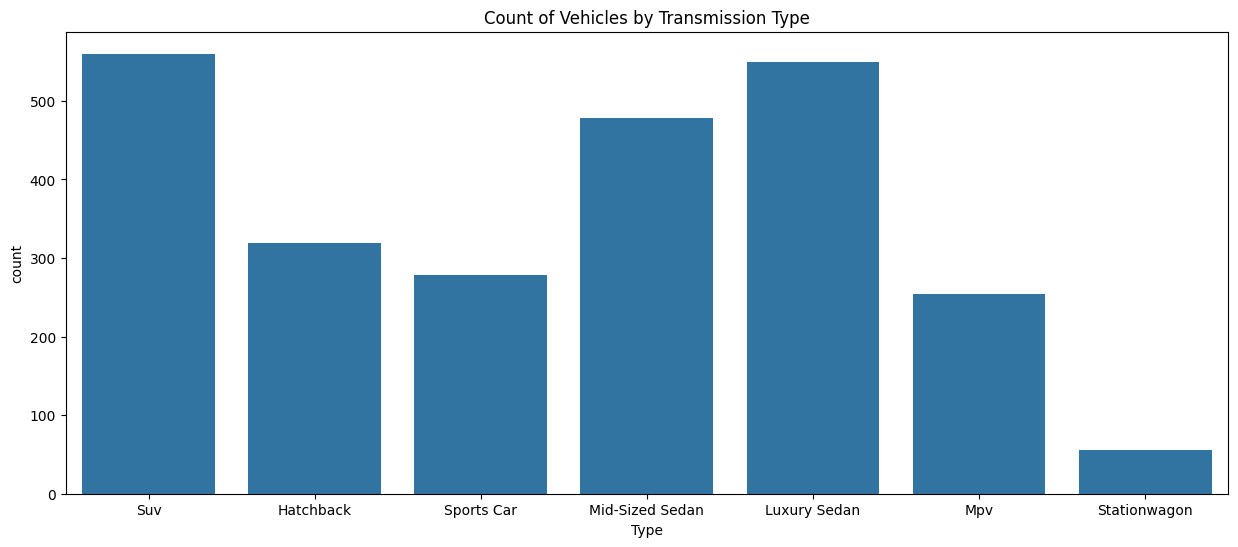

In [13]:
# Create a count plot to visualize the count of vehicles by transmission type
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Type')
# sns.countplot(data=df, y='Type') # Horizontal version

# Set the title and display the plot
plt.title('Count of Vehicles by Transmission Type')
plt.show()


### 🟩 **Histogram**
*Visualizing the Distribution of Numerical Data*
- A histogram is a graphical representation of the distribution of numerical data.
- It divides the data into bins (intervals) and displays the frequency (or proportion) of data points in each bin.
- It is useful for understanding the shape, spread, and central tendency of the data.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

array([[<Axes: title={'center': 'Reg_year'}>,
        <Axes: title={'center': 'Reg_month'}>,
        <Axes: title={'center': 'Days_since_registration'}>,
        <Axes: title={'center': 'Coe_left'}>],
       [<Axes: title={'center': 'Depreciation'}>,
        <Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Road_Tax'}>,
        <Axes: title={'center': 'Dereg_Value'}>],
       [<Axes: title={'center': 'COE'}>,
        <Axes: title={'center': 'Engine_Capacity'}>,
        <Axes: title={'center': 'Curb_Weight'}>,
        <Axes: title={'center': 'OMV'}>],
       [<Axes: title={'center': 'ARF'}>,
        <Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

Text(0.5, 0.98, 'Histograms of Numerical Features')

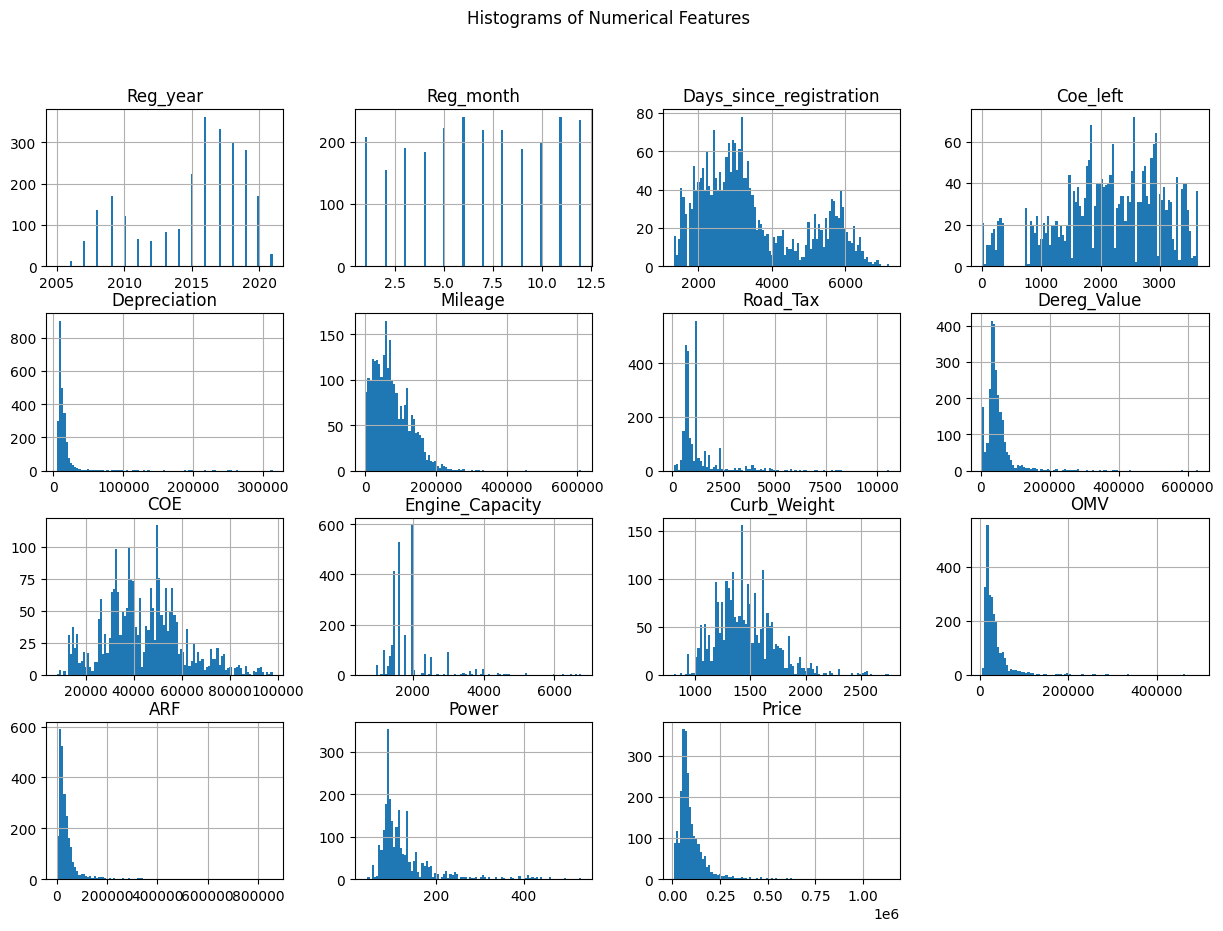

In [14]:
# Creates histograms for the columns listed in 'numerical_features' with 100 bins,
# and sets the figure size to 15x10 inches for better visibility.
df[numerical_features].hist(bins=100, figsize=(15, 10))  

# Adds a title above the histograms to describe the plot.
plt.suptitle("Histograms of Numerical Features")  

# Displaying the histograms
plt.show() 


💡 **Observations from Histograms**

1. **`Coe_left`**: 
   - Right-skewed distribution.
   - Most values concentrated between 0 and 3000.

2. **`Depreciation`**: 
   - Strong right skew.
   - Majority of vehicles experience low depreciation, with a few having exceptionally high values.

3. **`Mileage`**: 
   - Right-skewed distribution.
   - Most vehicles have mileage below 200,000 km.

4. **`Road_Tax`**: 
   - Peaks at lower values, indicating most vehicles have low road tax.

5. **`Dereg_Value`**: 
   - Right-skewed distribution.
   - Majority of vehicles have a low deregistration value.

6. **`COE`**: 
   - Distribution centered between 20,000 and 80,000.
   - Reflects potential trends in certificate of entitlement prices.

7. **`Engine_Capacity`**: 
   - Highly right-skewed.
   - Most vehicles have engine capacities below 2500cc, with few high-capacity vehicles.

8. **`Curb_Weight`**: 
   - Concentrated between 1000-2000 kg.

9. **`OMV (Open Market Value)`**: 
   - Strong right skew.
   - Most vehicles have low OMV values.

10. **`ARF (Additional Registration Fee)`**: 
    - Similar distribution to OMV, indicating a possible correlation.

11. **`Power`**: 
    - Peaks in lower ranges.
    - Most vehicles are not high-powered.

12. **`Price`**: 
    - Concentrated at lower ranges with a few high-priced vehicles.

👓 **Key Insights**:
- **Right-Skewed Variables**: Many features are right-skewed (e.g., Mileage, Depreciation, Price), with a majority of values at the lower end and a few extreme outliers.
- **Potential Correlations**: Features like OMV, ARF, COE, and Price may have strong relationships worth exploring further.
- **Outliers**: Outliers in variables like Depreciation, Mileage, and Price may impact analysis and should be handled appropriately.


### 🟩 **KDE Plot**
*Visualizing the Probability Density of a Continuous Variable*
- A Kernal Density Estimate Plot (KDE) plot is a smooth, continuous estimate of the probability density function of a continuous variable.
- It is used to visualize the distribution of data by estimating the underlying probability density, providing a smoother alternative to histograms.
- The KDE plot can help identify the presence of multiple peaks (modalities) in the data and gives insight into the shape and spread of the distribution.
- It is particularly useful for visualizing the distribution of data when you want to avoid the binning effect that can occur with histograms.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='Engine_Capacity', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot of Engine Capacity')

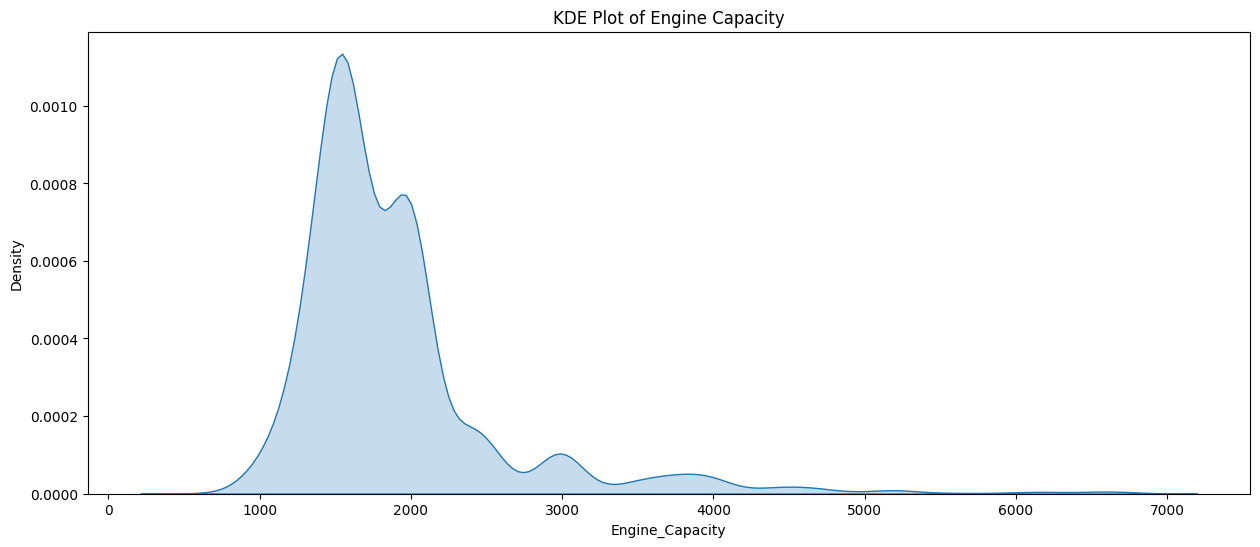

In [15]:
# Create a KDE plot to visualize the distribution of engine capacity
plt.figure(figsize=(15, 6))
sns.kdeplot(data=df, x='Engine_Capacity', fill=True)

# Set the title and display the plot
plt.title('KDE Plot of Engine Capacity')
plt.show()


### 🟩 **Radial Bar Chart**
*Visualizing Data in a Circular Layout*
- A radial bar chart is a variation of a bar chart where the bars are arranged in a circular layout, radiating from a central point.
- Each bar represents a category or data point, with its length indicating the value. The bars are typically placed in a circular pattern around the center, with the distance from the center representing the value of the data.
- Radial bar charts are useful for visualizing data when you want to emphasize cyclical patterns, such as hours in a day, months of the year, or percentages of a whole.
- They provide a visually appealing way to represent data with a circular design, offering a unique alternative to linear bar charts, especially for highlighting trends or comparisons within a circular structure.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

[Text(0.0, 0, 'Suv'),
 Text(0.8975979010256552, 0, 'Luxury Sedan'),
 Text(1.7951958020513104, 0, 'Mid-Sized Sedan'),
 Text(2.6927937030769655, 0, 'Hatchback'),
 Text(3.5903916041026207, 0, 'Sports Car'),
 Text(4.487989505128276, 0, 'Mpv'),
 Text(5.385587406153931, 0, 'Stationwagon')]

Text(0.5, 1.0, 'Total counts for Car Type')

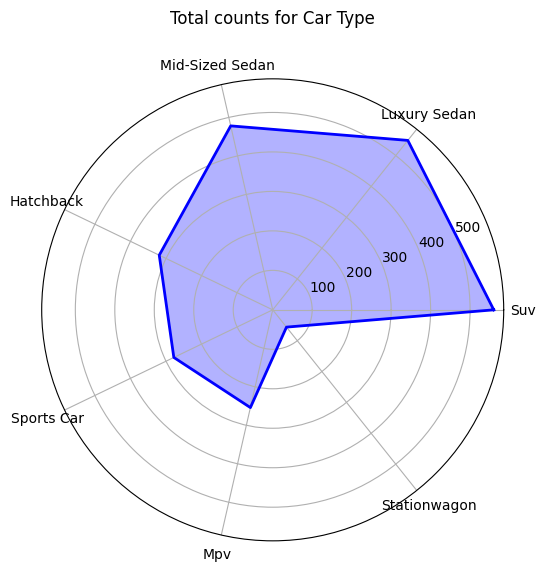

In [16]:
# Calculate the value counts for car types and prepare angles for a radial plot
car_counts = df['Type'].value_counts()
angles = [n / float(len(car_counts)) * 2 * pi for n in range(len(car_counts))]
angles += angles[:1]  # Close the circle by repeating the first angle
values = list(car_counts) + list(car_counts[:1])  # Close the circle by repeating the first value

# Create a polar subplot for the radial bar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

# Fill the area with a blue color and add a border line
ax.fill(angles, values, color='blue', alpha=0.3)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each section based on the car types
ax.set_xticks(angles[:-1])  # Remove the extra last angle
ax.set_xticklabels(car_counts.index, fontsize=10)

# Set title
ax.set_title('Total counts for Car Type', fontsize=12, pad=40) 

# Display the plot
plt.show()


### 🟩 **Word Cloud**
*Visualizing Word Frequency in Text Data*
- A word cloud (also known as a tag cloud) is a visual representation of text data where the size of each word reflects its frequency or importance within the text.
- Words that appear more frequently in the text are displayed larger, while less frequent words are smaller. This allows for an intuitive understanding of the most common or significant terms in a dataset.
- Word clouds are commonly used for analyzing and presenting text data, such as survey responses, social media posts, or reviews, and are great for highlighting key topics or themes.
- They provide a quick, visually appealing way to explore the content of large text datasets and identify recurring words or trends.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1000x500 with 0 Axes>

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

Text(0.5, 1.0, 'Word Cloud of Car Brands')

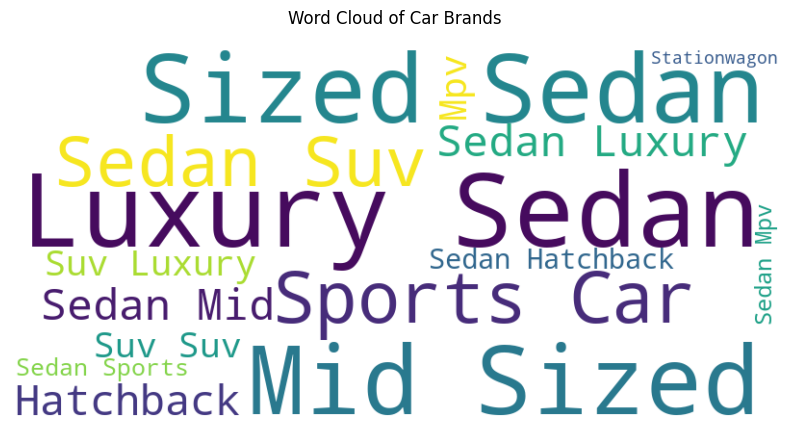

In [17]:
# Combine all car types into a single string to generate a word cloud
text = ' '.join(df['Type'].astype(str))

# Create the word cloud with specified dimensions and white background
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smooth rendering
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Car Brands')  # Set the title
plt.show()


### 🟩 **Violin Plot**
*Visualizing Distribution and Density of Data*
- A violin plot combines aspects of a boxplot and a kernel density plot to display the distribution of data.
- It shows the probability density of the data at different values, with the width of the "violin" representing the distribution of the data across different ranges.
- Like a boxplot, it includes the median, quartiles, and outliers, but it also highlights the density, providing a more detailed view of the distribution.
- Violin plots are particularly useful for comparing the distribution and density of a numerical variable across different categories

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Axes: xlabel='Engine_Capacity'>

Text(0.5, 1.0, 'Violin Plot of Engine Capacity')

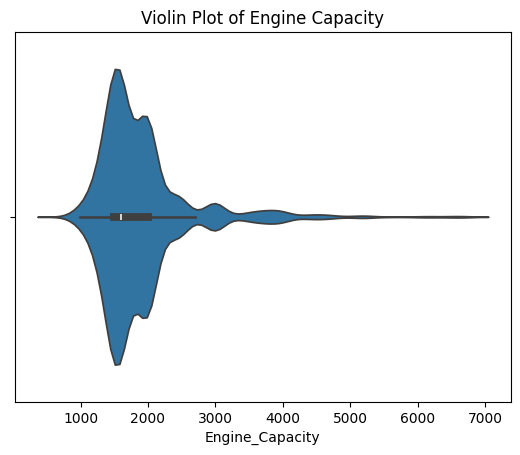

In [18]:
# Create a violin plot to visualize the distribution of engine capacity
sns.violinplot(data=df, x='Engine_Capacity')

# Set the title and display the plot
plt.title('Violin Plot of Engine Capacity')
plt.show()


## 🟦 **EDA - Bivariate Analysis**
*Relationship Between Two Features*

### 🟦 **Boxplot (w/ Y-axes)**
*Visualizing Distribution and Outliers*
- A boxplot (or box-and-whisker plot) is a graphical representation of the distribution of a dataset.
- It displays the median, quartiles, and potential outliers in the data, giving a clear picture of the spread and skewness.
- The "box" represents the interquartile range (IQR), while the "whiskers" show the range of the data. Outliers are typically marked as points outside the whiskers.
- Boxplots are useful for comparing distributions across multiple categories and identifying any extreme values.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='Type', ylabel='Depreciation'>

Text(0.5, 1.0, 'Boxplot of Depreciation by Vehicle Type')

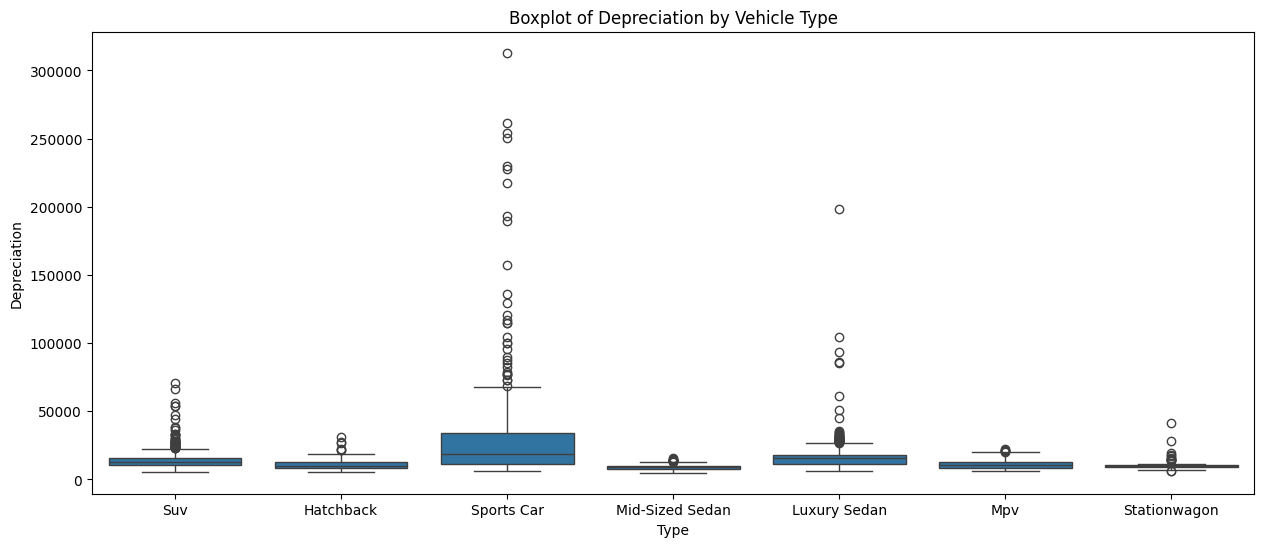

In [19]:
# Create a boxplot to visualize depreciation by vehicle type
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Type', y='Depreciation')

# Set the title and display the plot
plt.title('Boxplot of Depreciation by Vehicle Type')
plt.show()


### 🟦 **Count Plot (w/ Hue)**
*Visualizing the Frequency of Categorical Data*
- A count plot is a type of bar plot that displays the frequency (or count) of observations in each category of a categorical variable.
- Each bar represents the count of occurrences of each unique category, allowing for easy comparison of the sizes of different groups.
- Count plots are particularly useful for showing the distribution of categories in a dataset and for identifying any imbalances or skewness in categorical variables.
- This type of plot is often used to understand the frequency distribution and identify patterns in categorical data.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='Type', ylabel='count'>

Text(0.5, 1.0, 'Count of Vehicles by Transmission Type')

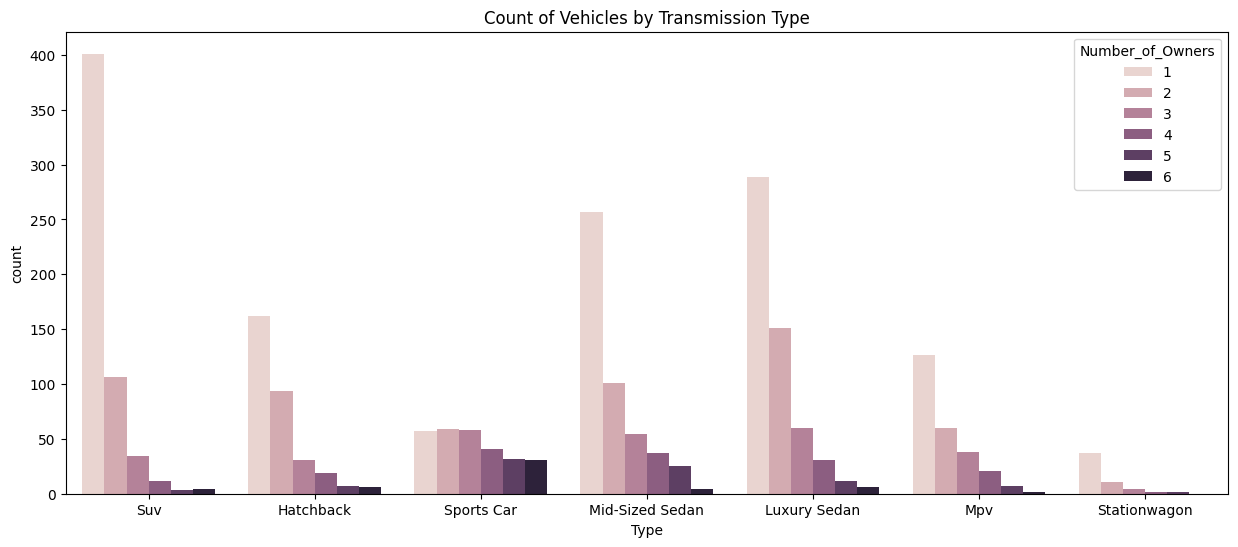

In [20]:
# Create a count plot to visualize the count of vehicles by transmission type
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Type', hue='Number_of_Owners')

# Set the title and display the plot
plt.title('Count of Vehicles by Transmission Type')
plt.show()


### 🟦 **Heatmap**
*Visualizing Correlations Between Variables*
- A heatmap is a graphical representation of data where individual values are represented by colors.
- It is commonly used to visualize correlations between variables in a dataset, with color intensity indicating the strength of the relationship.
- Heatmaps are particularly useful for identifying patterns, outliers, and areas of high correlation across a large number of variables.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Heatmap of Feature Correlations')

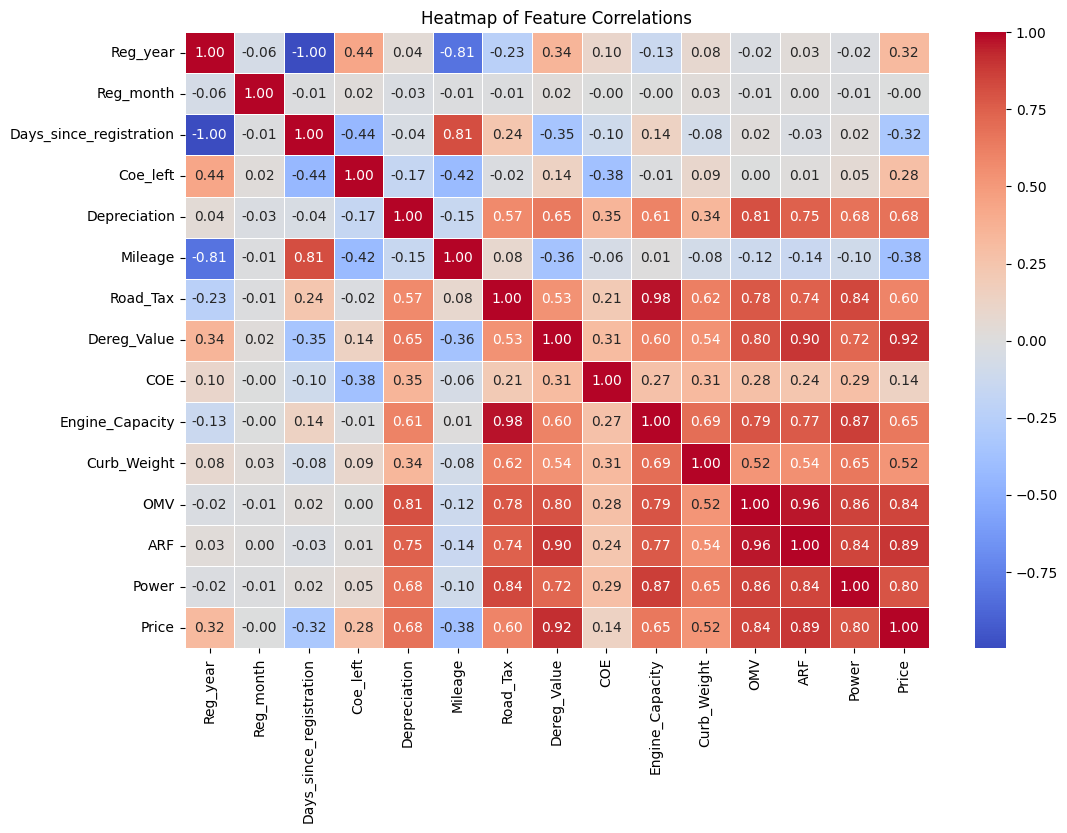

In [21]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Create the heatmap with annotations and a color map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and display the plot
plt.title("Heatmap of Feature Correlations")
plt.show()


💡 Observations from Correlation Heatmap

1. **Strong linear relationship**:
   - `OMV` and `ARF`: Expected, as ARF is directly derived from OMV.
   - `Dereg_Value` and `Price`: Expected, deregistration value reflects the price of the vehicle.
   - `Engine_Capacity` and `Road_Tax`: Expected, road tax increases with higher engine capacity.
   - `Price` and `OMV`: Expected, OMV significantly contributes to the overall price of a vehicle.
   - `Power` and `ARF`: Expected, high-powered vehicles typically have a higher ARF.
   - `Power` and `OMV`: Expected, performance-oriented cars have a higher OMV.
   - `Power` and `Price`: Expected, more powerful cars tend to be more expensive.

2. **Linear relationship**:
   - `Dereg_Value` and `Depreciation`: Expected, deregistration value decreases as depreciation occurs.
   - `OMV` and `Depreciation`: Expected, vehicles with higher OMV tend to depreciate faster.
   - `Road_Tax` and `OMV`: Expected, OMV influences road tax indirectly.
   - `Curb_Weight` and `Engine_Capacity`: Expected, heavier vehicles tend to have larger engines.
   - `ARF` and `Engine_Capacity`: Expected, larger engines increase ARF due to higher base value.
   - `Price` and `Depreciation`: Expected, higher-priced cars often depreciate faster.
   - `Price` and `Power`: Expected, higher power output generally aligns with higher price brackets.

3. **Some linear relationship**:
   - `Mileage` and `Price`: Expected, as higher mileage can reduce vehicle price.
   - `Dereg_Value` and `Road_Tax`: Expected, vehicles with higher road tax often have higher deregistration value.
   - `Price` and `Curb_Weight`: Expected, heavier vehicles, such as luxury SUVs, are often priced higher.
   - `Depreciation` and `Curb_Weight`: Expected, heavier cars often have higher depreciation rates.
   - `Price` and `Engine_Capacity`: Expected, vehicles with larger engines are generally priced higher.

### 🟦 **Histogram with Density**
*Visualizing the Distribution of Numerical Data*
- A histogram with density is a graphical representation of the distribution of numerical data.
- It divides the data into bins (intervals) and displays the frequency (or proportion) of data points in each bin.
- A Kernel Density Estimate (KDE) curve is overlaid to provide a smooth estimate of the data distribution.
- It is useful for understanding the shape, spread, and central tendency of numerical data.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='Price', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Price with KDE')

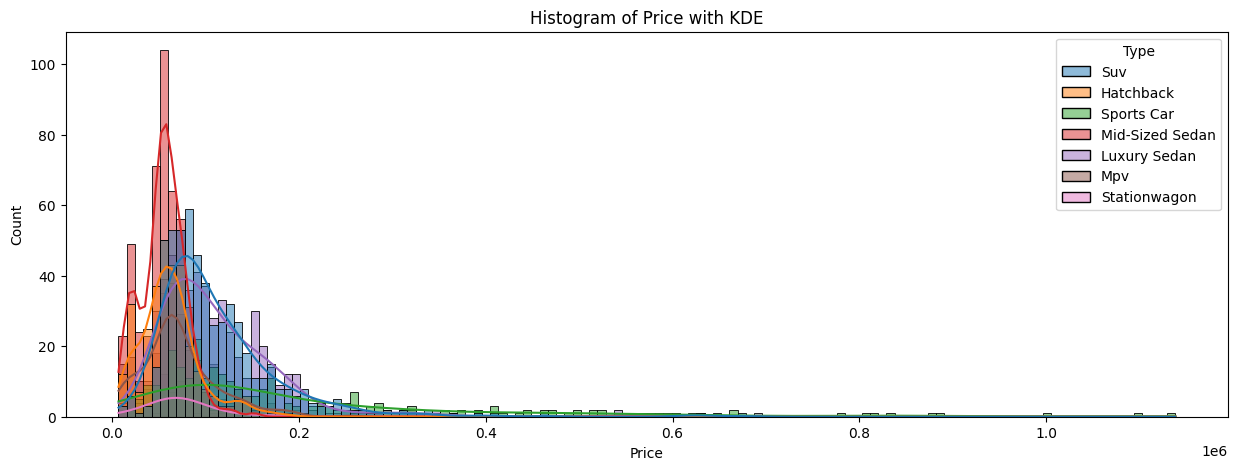

In [22]:
# Histogram with KDE
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Price', kde=True, hue='Type')
plt.title('Histogram of Price with KDE')
plt.show()


### 🟦 **KDE Plot (w/ Hue)**
*Visualizing the Probability Density of a Continuous Variable*
- A Kernal Density Estimate Plot (KDE) plot is a smooth, continuous estimate of the probability density function of a continuous variable.
- It is used to visualize the distribution of data by estimating the underlying probability density, providing a smoother alternative to histograms.
- The KDE plot can help identify the presence of multiple peaks (modalities) in the data and gives insight into the shape and spread of the distribution.
- It is particularly useful for visualizing the distribution of data when you want to avoid the binning effect that can occur with histograms.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='Engine_Capacity', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot of Engine Capacity by Car Type')

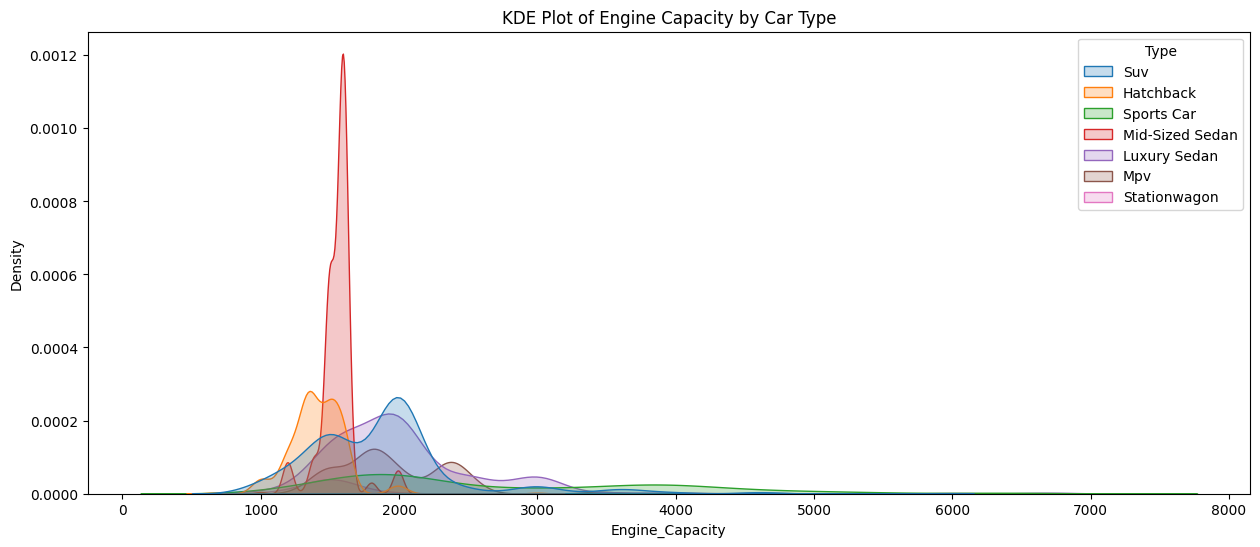

In [23]:
# Create a KDE plot to visualize the distribution of engine capacity by car type
plt.figure(figsize=(15, 6))
sns.kdeplot(data=df, x='Engine_Capacity', hue='Type', fill=True)

# Set the title and display the plot
plt.title('KDE Plot of Engine Capacity by Car Type')
plt.show()


### 🟦 **Lollipop Chart**
*Visualizing Data with a Simple and Clear Design*
- A lollipop chart is a variation of a bar chart where each data point is represented by a line (the "stick") and a marker (the "lollipop").
- The "stick" indicates the value of each data point, while the marker at the end of the stick represents the actual value in a visually distinct way.
- Lollipop charts are useful for displaying individual data points in a clean and simple manner, providing a more visually appealing alternative to bar charts.
- They are commonly used when comparing values across categories or to highlight specific data points in a dataset without the clutter of a full bar chart.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1500x600 with 0 Axes>

<StemContainer object of 3 artists>

Text(0.5, 1.0, 'Lollipop Chart of Average Price by Car Type')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Mid-Sized Sedan'),
  Text(1, 0, 'Hatchback'),
  Text(2, 0, 'Mpv'),
  Text(3, 0, 'Stationwagon'),
  Text(4, 0, 'Suv'),
  Text(5, 0, 'Luxury Sedan'),
  Text(6, 0, 'Sports Car')])

Text(0, 0.5, 'Average Price')

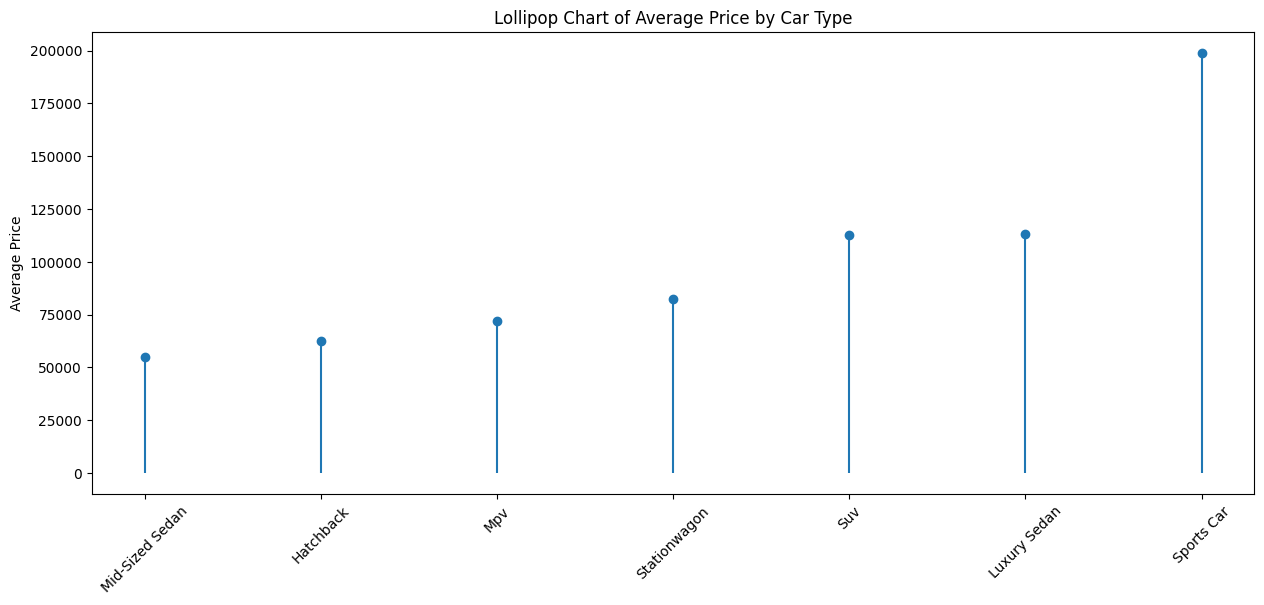

In [24]:
# Calculate the average price for each car type and sort the values
average_price = df.groupby('Type')['Price'].mean().sort_values()

# Create a lollipop chart to visualize the average price by car type
plt.figure(figsize=(15, 6)) 
plt.stem(average_price.index, average_price.values, basefmt=" ")

# Set the title, labels, and rotate the x-axis labels for better readability
plt.title('Lollipop Chart of Average Price by Car Type')
plt.xticks(rotation=45)
plt.ylabel('Average Price')

# Display the plot
plt.show()


### 🟦 **Pairplot**
*Visualizing Pairwise Relationships in a Dataset*
- A pairplot is a grid of scatter plots and histograms that visualizes pairwise relationships between numerical variables in a dataset.
- It is useful for exploring correlations, distributions, and patterns across multiple variables.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

Text(0.5, 1.02, 'Pairplot of Numerical Features')

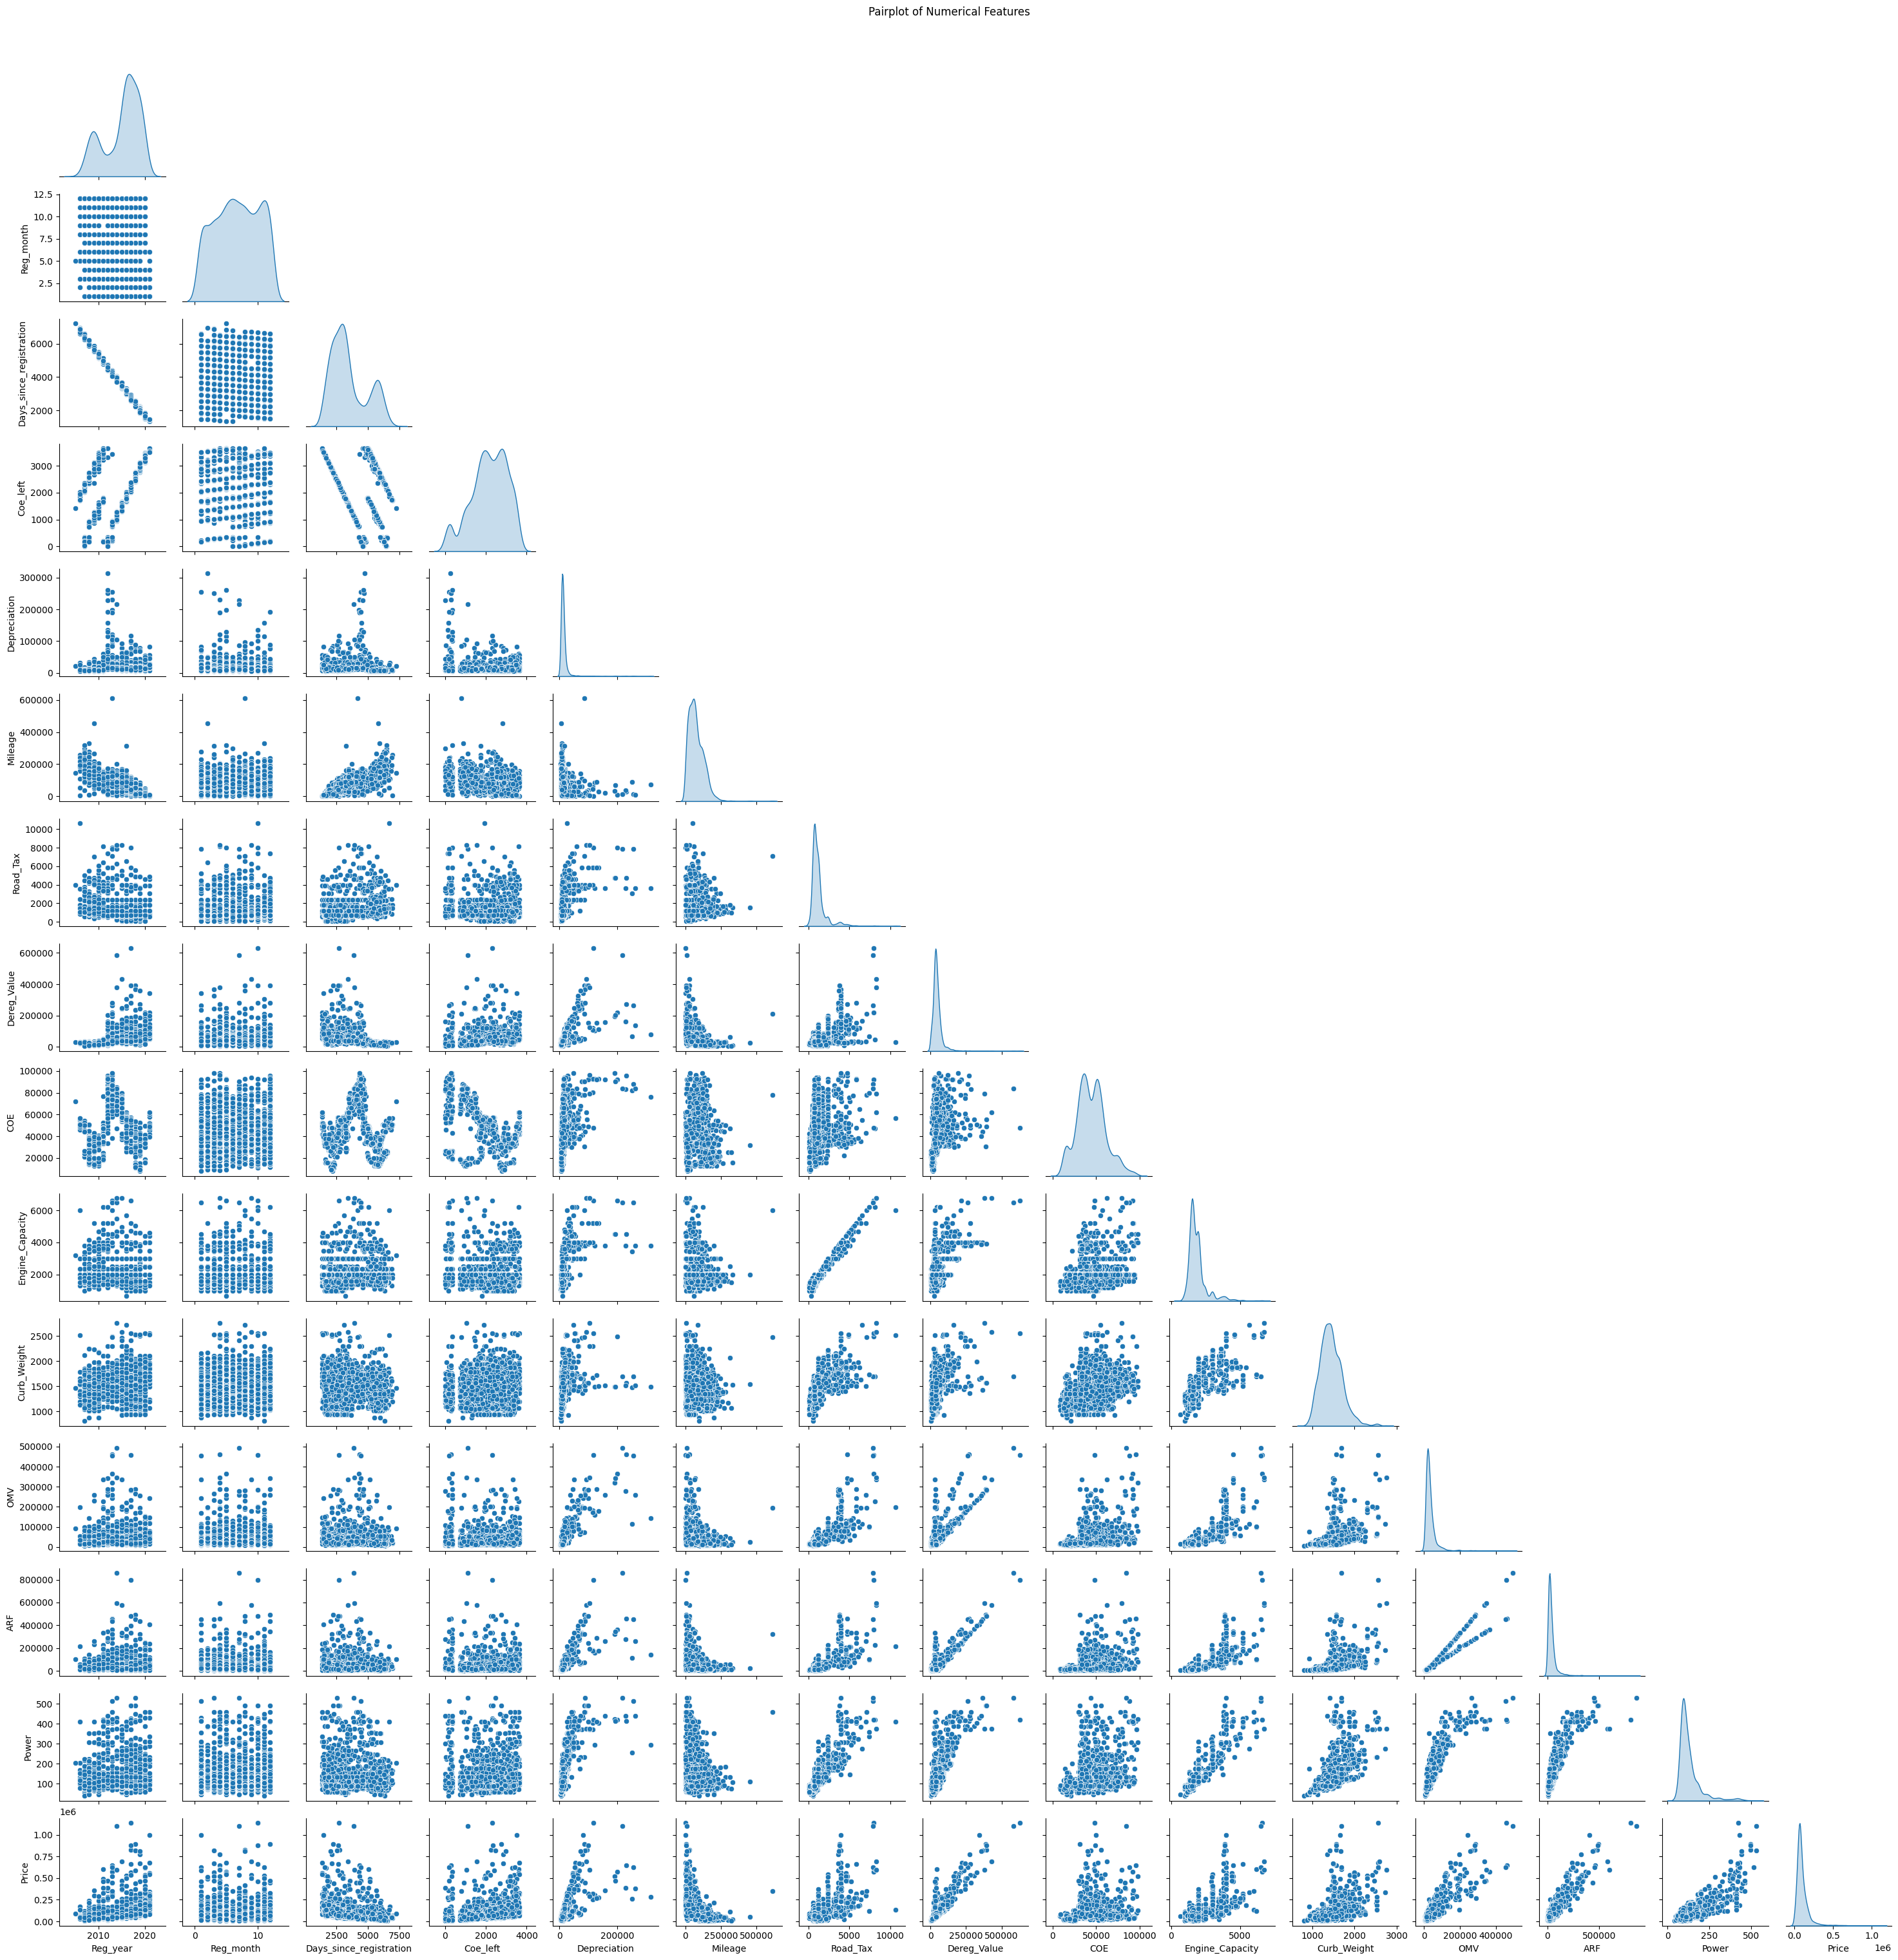

In [25]:
# Create a pairplot of numerical features with KDE on the diagonal
sns.pairplot(df[numerical_features], diag_kind='kde', corner=True, height=2)

# Set the title of the plot
plt.suptitle("Pairplot of Numerical Features", y=1.02)

# Display the plot
plt.show()


💡 Observations from Pairplot with Explanations

1. **Strong linear relationship**:
   - `Engine_Capacity` and `Road_Tax`: Expected, as higher engine capacity increases road tax.
   - `ARF` and `OMV`: Expected, ARF is derived directly from OMV.
   
2. **Linear relationship**:
   - `Dereg_Value` and `Depreciation`: Expected, deregistration value reflects depreciation over time.
   - `OMV` and `Depreciation`: Expected, higher OMV vehicles depreciate more.
   - `OMV` and `Road_Tax`: Expected, road tax is linked to OMV indirectly.
   - `OMV` and `Dereg_Value`: Expected, deregistration value depends on OMV.
   - `ARF` and `Depreciation`: Expected, as ARF impacts initial cost and depreciation.
   - `ARF` and `Dereg_Value`: Expected, deregistration value is tied to ARF.
   - `ARF` and `Engine_Capacity`: Expected, engine capacity correlates with ARF.
   - `Power` and `Road_Tax`: Expected, higher power implies higher tax brackets.
   - `Power` and `Engine_Capacity`: Expected, larger engines generally produce more power.
   - `Power` and `OMV`: Expected, high-performance cars have higher OMV.
   - `Power` and `ARF`: Expected, ARF reflects high-performance vehicles.
   - `Price` and `Depreciation`: Expected, high-priced cars depreciate faster.
   - `Price` and `Dereg_Value`: Expected, deregistration value depends on original price.
   - `Price` and `OMV`: Expected, OMV contributes directly to vehicle price.
   - `Price` and `ARF`: Expected, ARF impacts final vehicle price.
   - `Price` and `Power`: Expected, high-powered cars are costlier.

3. **Some linear relationship**:
   - `Dereg_Value` and `Road_Tax`: Expected, higher deregistration value reflects higher road tax.
   - `Curb_Weight` and `Road_Tax`: Expected, heavier vehicles are taxed more.
   - `Curb_Weight` and `Engine_Capacity`: Expected, larger engines are in heavier cars.
   - `OMV` and `Engine_Capacity`: Expected, larger engines increase OMV.
   - `OMV` and `Curb_Weight`: Expected, luxury cars with higher OMV weigh more.
   - `ARF` and `Road_Tax`: Expected, ARF indirectly influences tax.
   - `Power` and `Curb_Weight`: Expected, high-powered cars are generally heavier.
   - `Price` and `Road_Tax`: Expected, higher-priced cars are taxed more.
   - `Price` and `Engine_Capacity`: Expected, larger engines increase price.
   - `Price` and `Curb_Weight`: Expected, heavier vehicles are more expensive.


### 🟦 **Radial Bar Chart**
*Visualizing Data in a Circular Layout*
- A radial bar chart is a variation of a bar chart where the bars are arranged in a circular layout, radiating from a central point.
- Each bar represents a category or data point, with its length indicating the value. The bars are typically placed in a circular pattern around the center, with the distance from the center representing the value of the data.
- Radial bar charts are useful for visualizing data when you want to emphasize cyclical patterns, such as hours in a day, months of the year, or percentages of a whole.
- They provide a visually appealing way to represent data with a circular design, offering a unique alternative to linear bar charts, especially for highlighting trends or comparisons within a circular structure.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

[Text(0.0, 0, 'Hatchback'),
 Text(0.8975979010256552, 0, 'Luxury Sedan'),
 Text(1.7951958020513104, 0, 'Mid-Sized Sedan'),
 Text(2.6927937030769655, 0, 'Mpv'),
 Text(3.5903916041026207, 0, 'Sports Car'),
 Text(4.487989505128276, 0, 'Stationwagon'),
 Text(5.385587406153931, 0, 'Suv')]

Text(0.5, 1.0, 'Average Engine Capacity by Car Type')

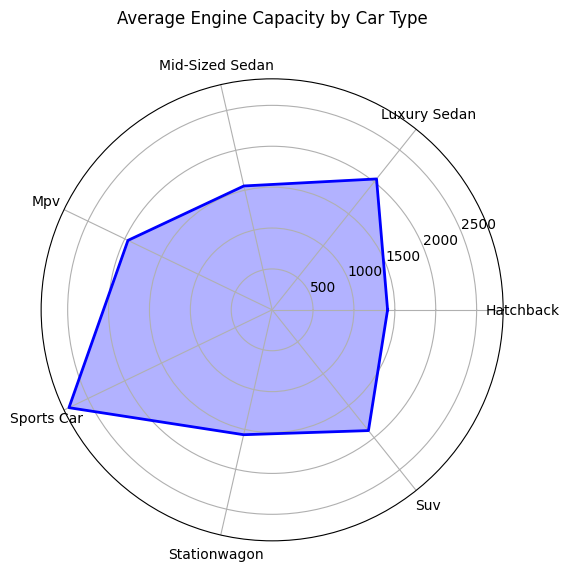

In [26]:
# Calculate average engine capacity for each car type
avg_engine_capacity = df.groupby('Type')['Engine_Capacity'].mean()

# Prepare angles for a radial plot
angles = [n / float(len(avg_engine_capacity)) * 2 * pi for n in range(len(avg_engine_capacity))]
angles += angles[:1]  # Close the circle
values = list(avg_engine_capacity) + list(avg_engine_capacity[:1])  # Close the circle

# Create a polar subplot for the radial plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

# Fill the area with a blue color and add a border line
ax.fill(angles, values, color='blue', alpha=0.3)
ax.plot(angles, values, color='blue', linewidth=2)

# Set the labels for each section based on car types
ax.set_xticks(angles[:-1])  # Remove the extra last angle
ax.set_xticklabels(avg_engine_capacity.index, fontsize=10)

# Set title
ax.set_title('Average Engine Capacity by Car Type', fontsize=12, pad=40) 

# Display the plot
plt.show()


### 🟦 **Scatter Plot (w/ Trendline)**
*Visualizing Relationships Between Variables with a Trend*
- A scatter plot with a trendline is used to visualize the relationship between two continuous variables by plotting individual data points on a graph and fitting a trendline (typically a linear regression line) to show the overall direction of the relationship.
- The scatter plot shows how data points are distributed, while the trendline helps identify the underlying pattern, such as a positive, negative, or no correlation between the variables.
- The trendline is especially helpful for identifying trends, making predictions, or quantifying the strength and direction of the relationship between the variables.
- This type of plot is commonly used in regression analysis and for visualizing correlations in data.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

Text(0.5, 1.0, 'Scatterplot with Trendline: Price vs Mileage')

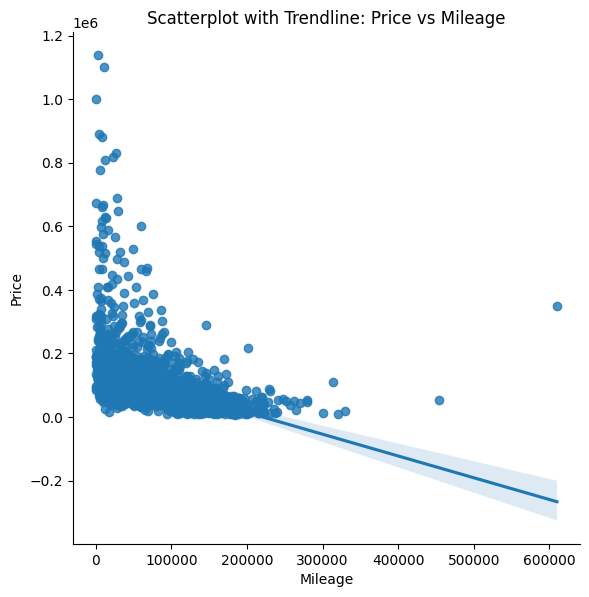

In [27]:
# Create a scatter plot with a trendline to visualize price vs mileage by car type
sns.lmplot(data=df, x='Mileage', y='Price', height=6)

# Set the title and display the plot
plt.title('Scatterplot with Trendline: Price vs Mileage')
plt.show()


### 🟦 **Violin Plot (w/ Y-axes)**
*Visualizing Distribution and Density of Data*
- A violin plot combines aspects of a boxplot and a kernel density plot to display the distribution of data.
- It shows the probability density of the data at different values, with the width of the "violin" representing the distribution of the data across different ranges.
- Like a boxplot, it includes the median, quartiles, and outliers, but it also highlights the density, providing a more detailed view of the distribution.
- Violin plots are particularly useful for comparing the distribution and density of a numerical variable across different categories

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Axes: xlabel='Engine_Capacity', ylabel='Price'>

Text(0.5, 1.0, 'Violin Plot of Price by Engine Capacity')

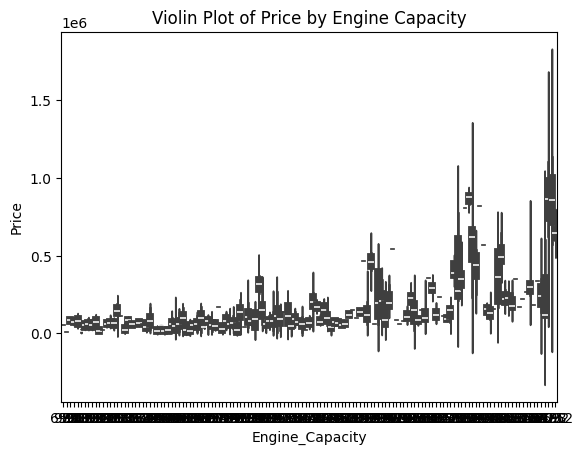

In [28]:
# Create a violin plot to visualize the distribution of price by engine capacity
sns.violinplot(data=df, x='Engine_Capacity', y='Price')

# Set the title and display the plot
plt.title('Violin Plot of Price by Engine Capacity')
plt.show()


## 🟪 **EDA - Multivariate Analysis**
*Relationship Between Multiple Features*

### 🟪 **3D Scatter Plot**
*Visualizing Relationships Between Three Variables in 3D Space*
- A 3D scatter plot is a variation of a scatter plot that adds a third dimension to represent relationships between three continuous variables.
- Each data point is plotted in a three-dimensional space using three axes (X, Y, and Z), allowing for the visualization of more complex relationships between variables.
- The 3D scatter plot is useful for identifying patterns, clusters, or correlations in data that has three dimensions, making it ideal for datasets with multiple variables.
- This plot provides an immersive way to explore multivariate data and gain insights into the spatial distribution of data points across three dimensions.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

Text(0.5, 0, 'Mileage')

Text(0.5, 0.5, 'Price')

Text(0.5, 0, 'Depreciation')

Text(0.5, 0.92, '3D Scatterplot: Mileage vs Price vs Depreciation')

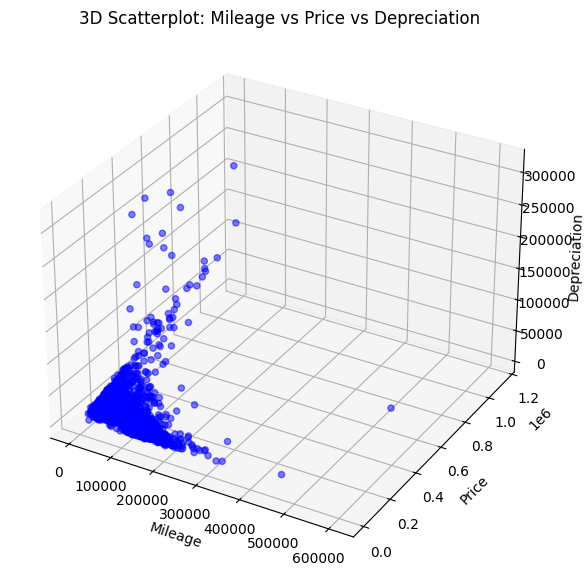

In [29]:
# Create a 3D scatter plot to visualize mileage, price, and depreciation
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot with mileage, price, and depreciation
sc = ax.scatter(df['Mileage'], df['Price'], df['Depreciation'], c='blue', alpha=0.5)

# Set the labels for each axis
ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
ax.set_zlabel('Depreciation')

# Set the title and display the plot
plt.title('3D Scatterplot: Mileage vs Price vs Depreciation')
plt.show()


### 🟪 **Bubble Chart**
*isualizing Relationships Between Numerical Variables with Size and Color*
- A bubble chart is a type of scatter plot where each data point is represented by a bubble, with three dimensions of data visualized: the X-axis, the Y-axis, and the size of the bubble.
- The position of each bubble on the X and Y axes represents two continuous variables, while the size of the bubble reflects a third variable, allowing for the visualization of additional information within the same plot.
- Bubble charts are useful for visualizing relationships between three variables, such as identifying clusters, correlations, and outliers, while also considering the magnitude of each data point.
- This type of chart is commonly used in financial analysis, market research, or when exploring the impact of one variable in relation to two other dimensions.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1500x600 with 0 Axes>

Text(0.5, 1.0, 'Bubble Chart: Mileage vs Price with Engine Capacity')

Text(0.5, 0, 'Mileage')

Text(0, 0.5, 'Price')

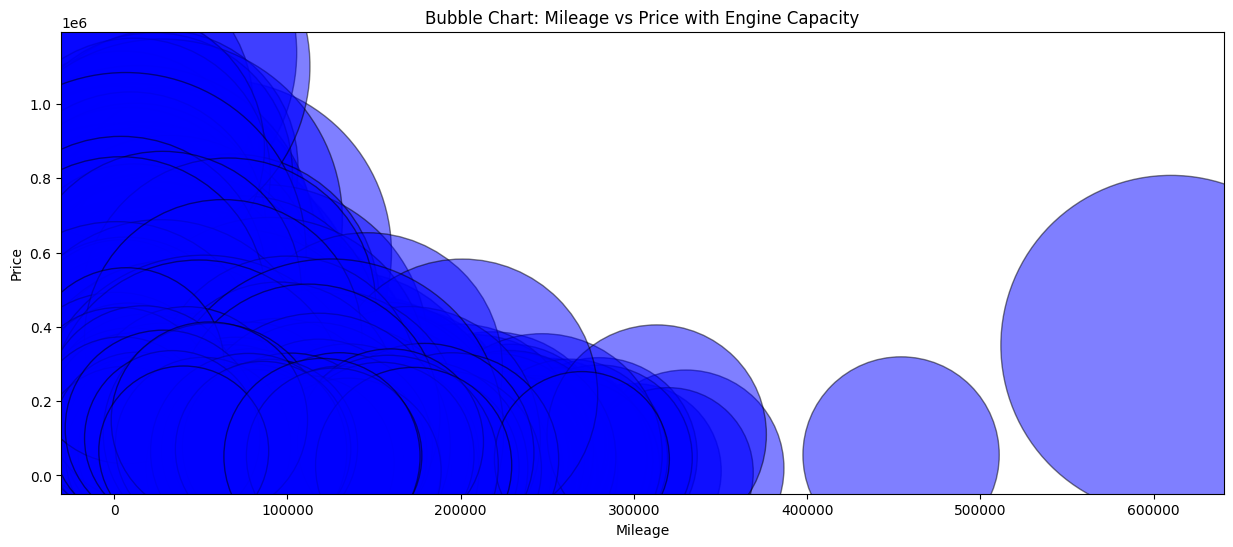

In [30]:
# Create a bubble chart to visualize mileage vs price, with bubble size representing engine capacity
plt.figure(figsize=(15, 6)) 
plt.scatter(df['Mileage'], df['Price'], s=df['Engine_Capacity']*10, alpha=0.5, c='blue', edgecolors='black')

# Set the title and axis labels
plt.title('Bubble Chart: Mileage vs Price with Engine Capacity')
plt.xlabel('Mileage')
plt.ylabel('Price')

# Display the plot
plt.show()


### 🟪 **FacetGrid**
*Visualizing Subsets of Data with Multiple Plots*
- A FacetGrid is a grid of multiple subplots (facets), each showing a subset of the data based on some categorical variable.
- It allows for the comparison of different subsets of data across multiple plots in a grid layout, making it easier to understand relationships and differences between subsets.
- FacetGrid is commonly used for categorical data visualization, where each facet represents a category or combination of categories, and each plot within the grid shows the distribution or relationship of a variable within that subset.
- This type of plot is particularly useful for visualizing how different groups behave across the same variable and helps in identifying patterns that vary across categories.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

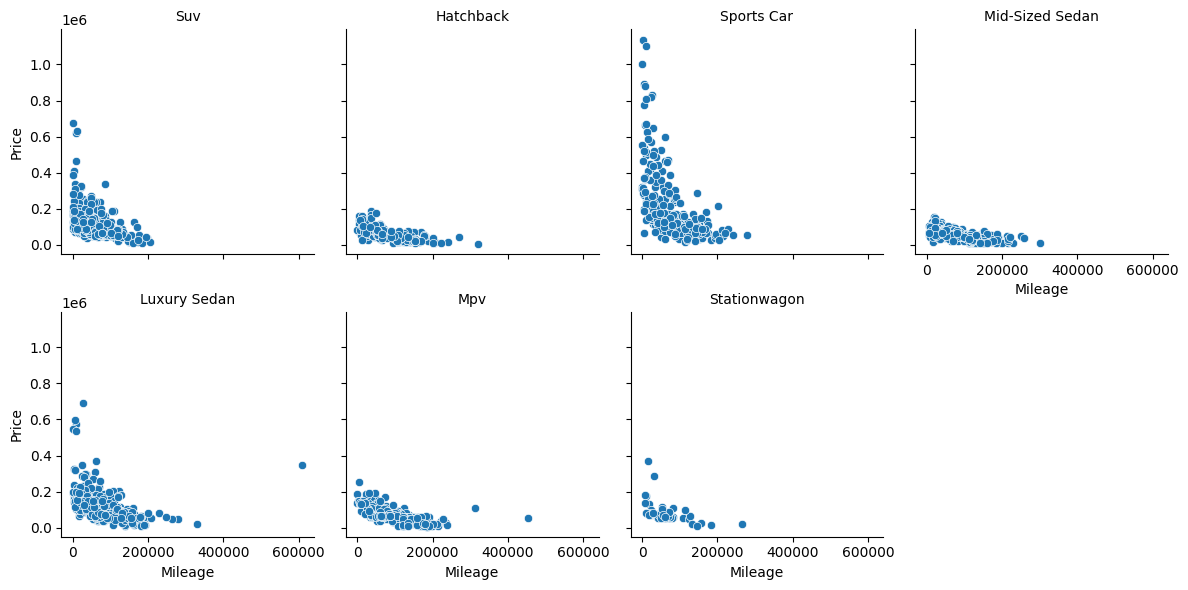

In [31]:
# Create a FacetGrid to visualize scatter plots of mileage vs price by car type
g = sns.FacetGrid(df, col='Type', col_wrap=4, height=3)
g.map(sns.scatterplot, 'Mileage', 'Price')

# Set the title for each subplot based on the column name (car type)
g.set_titles("{col_name}")

# Display the plot
plt.show()


### 🟪 **Heatmap of Categorical Variables**
*Visualizing the Relationship Between Categorical Variables*
- A heatmap of categorical variables is used to visualize the relationship between two or more categorical variables by displaying a matrix of their frequencies or counts.
- In this heatmap, each cell represents the intersection of two categories, with the color intensity indicating the strength or frequency of the relationship between them (e.g., higher values could be shown with a darker color).
- This type of heatmap is useful for spotting patterns, associations, or imbalances between categorical variables and can help identify significant correlations or groupings.
- It is commonly used in scenarios like analyzing contingency tables or exploring how different categories in two variables relate to each other.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

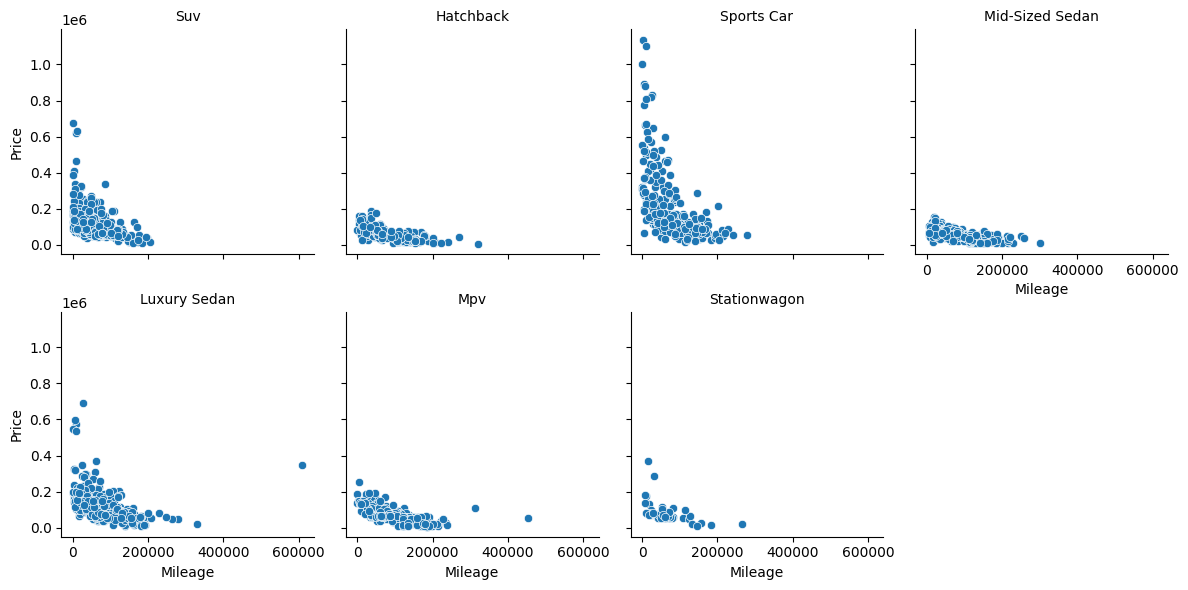

In [32]:
# Create a FacetGrid to visualize scatter plots of mileage vs price by car type
g = sns.FacetGrid(df, col='Type', col_wrap=4, height=3)
g.map(sns.scatterplot, 'Mileage', 'Price')

# Set the title for each subplot based on the column name (car type)
g.set_titles("{col_name}")

# Display the plot
plt.show()


### 🟪 **Scatter Plot (w/ Trendline & Hue)**
*Visualizing Relationships Between Variables with a Trend*
- A scatter plot with a trendline is used to visualize the relationship between two continuous variables by plotting individual data points on a graph and fitting a trendline (typically a linear regression line) to show the overall direction of the relationship.
- The scatter plot shows how data points are distributed, while the trendline helps identify the underlying pattern, such as a positive, negative, or no correlation between the variables.
- The trendline is especially helpful for identifying trends, making predictions, or quantifying the strength and direction of the relationship between the variables.
- This type of plot is commonly used in regression analysis and for visualizing correlations in data.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

Text(0.5, 1.0, 'Scatterplot with Trendline: Price vs Mileage')

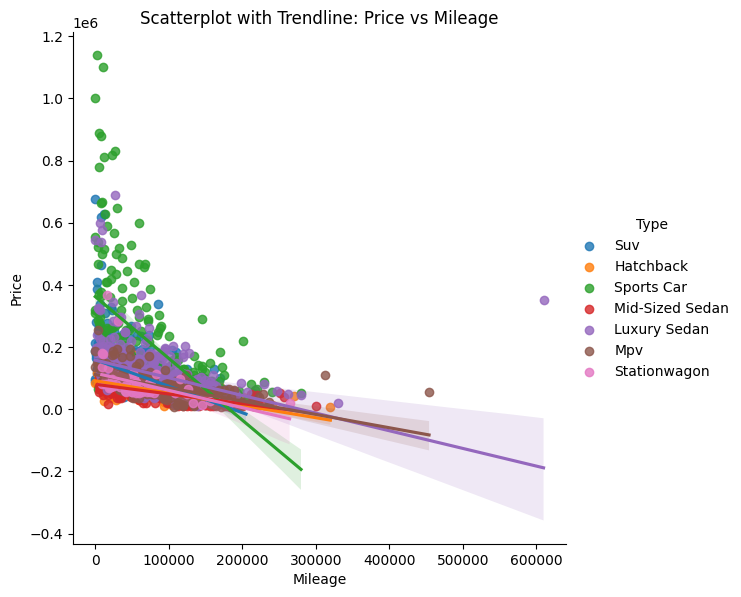

In [33]:
# Create a scatter plot with a trendline to visualize price vs mileage by car type
sns.lmplot(data=df, x='Mileage', y='Price', hue='Type', height=6)

# Set the title and display the plot
plt.title('Scatterplot with Trendline: Price vs Mileage')
plt.show()


### 🟪 **Stacked Bar Chart**
*Visualizing Proportions Across Categories*
- A stacked bar chart is a variation of a bar chart where each bar is divided into multiple segments, representing different categories or sub-categories.
- The length of each segment corresponds to the value or proportion of that category within the total, making it easy to compare both the total and the individual components across categories.
- Stacked bar charts are useful for visualizing the relative composition of each category and understanding how the parts contribute to the whole across different groups or time periods.
- This type of chart helps in comparing the total values as well as the proportions of each category within each bar.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Axes: xlabel='Number_of_Owners'>

Text(0.5, 1.0, 'Stacked Bar Chart of Car Type by Number of Owners')

Text(0.5, 0, 'Number of Owners')

Text(0, 0.5, 'Count')

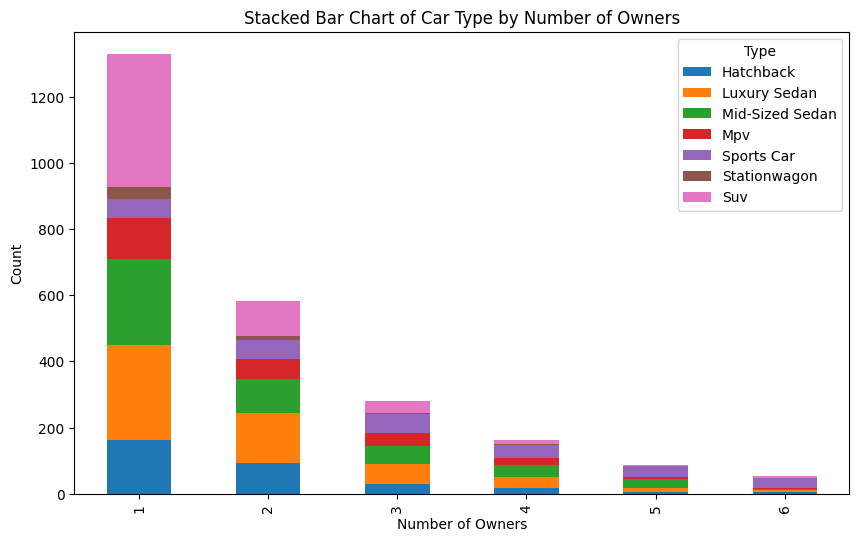

In [34]:
# Create a stacked bar chart of car type by number of owners
pd.crosstab(df['Number_of_Owners'], df['Type']).plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and axis labels
plt.title('Stacked Bar Chart of Car Type by Number of Owners')
plt.xlabel('Number of Owners')
plt.ylabel('Count')

# Display the plot
plt.show()

### 🟪 **Swarm Plot**
*Visualizing Distribution and Data Points in a Categorical Context*
- A swarm plot displays individual data points in a categorical context, where each point represents an observation in the dataset.
- Unlike a scatter plot, it arranges the data points along an axis (usually a categorical one) without overlap, making it easy to see the distribution of data within each category.
- Swarm plots are particularly useful for visualizing small datasets or comparing distributions across categories, while also showing the density of points within a specific range.
- They provide a detailed view of the data's distribution and can highlight any clusters or gaps in the data.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

<Figure size 1500x600 with 0 Axes>

c:\Users\joeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 52.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\joeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\joeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\joeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

<Axes: xlabel='Type', ylabel='Mileage'>

Text(0.5, 1.0, 'Swarm Plot of Mileage by Transmission Type')

c:\Users\joeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\joeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\joeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\joeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

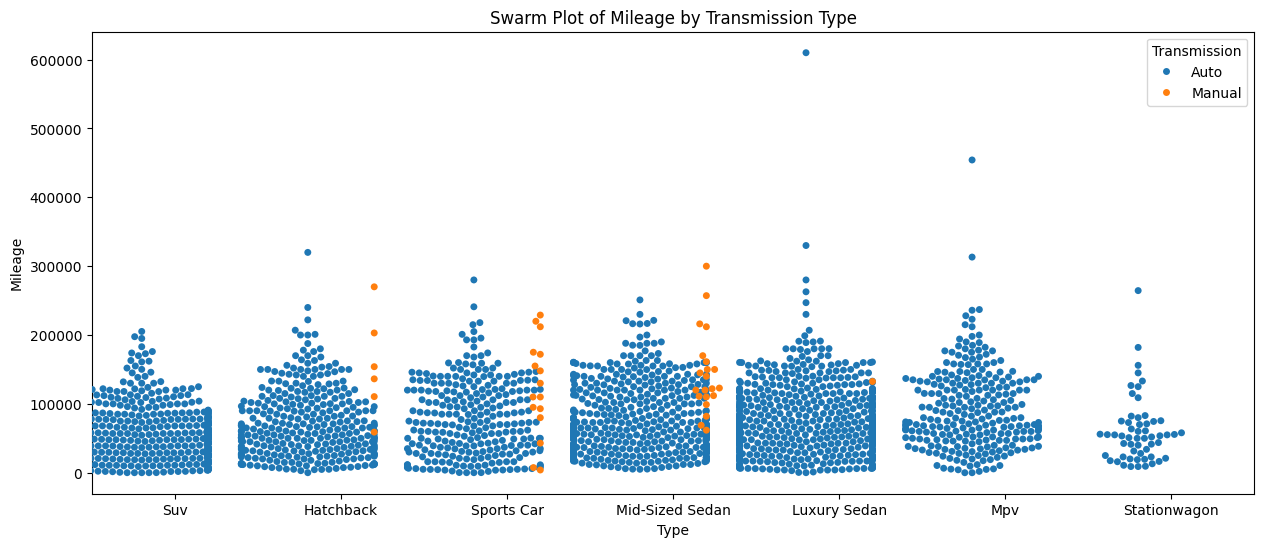

In [35]:
# Create a swarm plot to visualize mileage by vehicle type, colored by transmission type
plt.figure(figsize=(15, 6))
sns.swarmplot(data=df, x='Type', y='Mileage', hue='Transmission', dodge=True)

# Set the title and display the plot
plt.title('Swarm Plot of Mileage by Transmission Type')

# Add a legend with a title for transmission type
plt.legend(title='Transmission')
plt.show()


### 🟪 **Treemap**
*Visualizing Hierarchical Data with Nested Rectangles*
- A treemap is a hierarchical data visualization where each category is represented by a rectangle, and subcategories are represented by smaller nested rectangles inside the main category.
- The size of each rectangle corresponds to the value of the category or subcategory, while the color can represent another dimension of data, such as performance or status.
- Treemaps are useful for displaying proportions of a whole, particularly when dealing with large datasets with many categories or levels of hierarchy.
- They allow for a compact representation of complex hierarchical data, helping to identify patterns, trends, or areas of interest based on size and color.

For quick reference:
- Numerical features = [`Reg_year`, `Reg_month`, `Days_since_registration`, `Coe_left`, `Depreciation`, `Mileage`, `Road_Tax`, `Dereg_Value`, `COE`, `Engine_Capacity`, `Curb_Weight`, `OMV`, `ARF`, `Power`, `Price`]
- Categorical features = [`Brand`, `Type`, `Manufactured`, `Transmission`, `Number_of_Owners`]

In [36]:
# Create an interactive treemap to visualize price distribution by car type and transmission
fig = px.treemap(df, path=['Type', 'Transmission'], values='Price', color='Price', color_continuous_scale='Blues')

# Customize the plot title and font size
fig.update_layout(title='Interactive Treemap', title_font_size=20)


# ----------------------------------- END -----------------------------------